In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
pd.options.display.max_columns=30

In [4]:
df = pd.read_csv('energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
#info on dataset to know the number of rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

In [6]:
#Description of the dataset
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [7]:
#Checking for missing values
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [8]:
print(f'The numbers of rows in the dataset is {df.shape[0]} \nThe number of columns in the dataset is {df.shape[1]}')

The numbers of rows in the dataset is 19735 
The number of columns in the dataset is 29


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D3E385B00>,
      dtype=object)

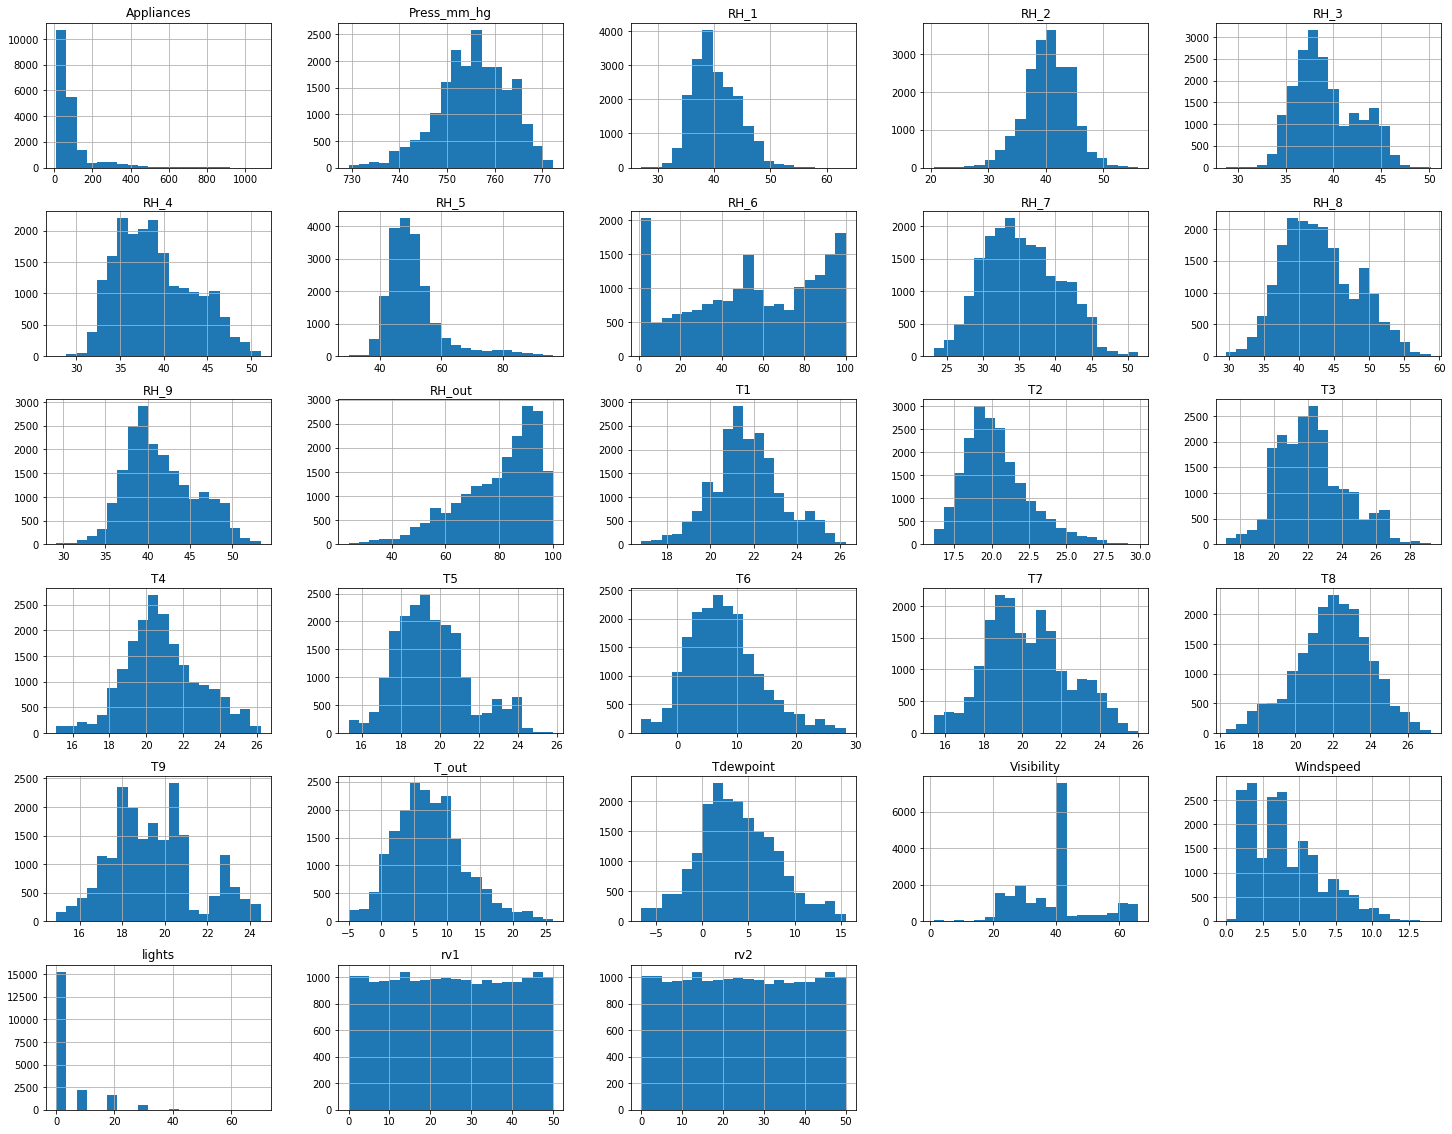

In [12]:
#Visualizing the dataset in an histogram format to understand the distribution
df.hist(bins=20, figsize=(25,20))

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
df.drop(columns=['date', 'lights'], axis=1, inplace=True)

In [26]:
scaler = MinMaxScaler()

In [27]:
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

C:\Users\Okon Saviour Andem\Anaconda python\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [17]:
#Instantiate the model
lm = LinearRegression()

In [37]:
x=normalised_df['T2']
y= normalised_df['T6']

In [66]:
a = np.array(x)

In [67]:
b = np.array(y)

In [68]:
x = np.reshape(a, (-1,1))

In [69]:
y = np.reshape(b, (-1,1))

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [71]:
df.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [72]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [73]:
pred = lm.predict(x_test)
pred

array([[0.23928945],
       [0.46794238],
       [0.23108472],
       ...,
       [0.3001772 ],
       [0.4297256 ],
       [0.3217686 ]])

In [75]:
from sklearn import metrics

In [77]:
print('R-Squared: ', round(metrics.r2_score(y_test, pred), 2))

R-Squared:  0.64


In [78]:
print('MAE: ', round(metrics.mean_absolute_error(y_test, pred), 2))

MAE:  0.08


In [81]:
print('RSS: ', round(np.sum(np.square(y_test-pred)),2))

RSS:  66.12


In [80]:
print('RMSE: ', round(np.sqrt(metrics.mean_squared_error(y_test, pred)), 3))

RMSE:  0.106


In [82]:
metrics.explained_variance_score(y_test, pred)

0.6428161771053018

In [107]:
print('RMSE: ', round(np.sqrt(metrics.mean_squared_error(y_test, pred)), 3))

RMSE:  0.106


In [83]:
from sklearn.linear_model import Lasso
lasso_reg= Lasso(alpha =0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [86]:
normalised_df.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [87]:
features_df = normalised_df.drop(columns = 'Appliances')
target = normalised_df['Appliances']

In [88]:
a_train, a_test, b_train, b_test = train_test_split(features_df, target, test_size = 0.3, random_state = 42)

In [89]:
lm.fit(a_train,b_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [90]:
predictions = lm.predict(a_test)

In [91]:
def obtain_weights_df(model, feature, col_name):
    weights = pd.Series(model.coef_, feature.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

linear_model_weights = obtain_weights_df(lm, a_train, 'Linear_Model_Weight')
linear_model_weights

,Features,Linear_Model_Weight
0,RH_2,-0.456698
1,T_out,-0.321860
2,T2,-0.236178
3,T9,-0.189941
4,RH_8,-0.157595
5,RH_out,-0.077671
6,RH_7,-0.044614
7,RH_9,-0.039800
8,T5,-0.015657
9,T1,-0.003281


In [92]:
linear_model_weights.min()

Features               Press_mm_hg
Linear_Model_Weight      -0.456698
dtype: object

In [93]:
linear_model_weights.max()

Features                    rv2
Linear_Model_Weight    0.553547
dtype: object

In [95]:
from sklearn.linear_model import Lasso
lasso_reg= Lasso(alpha =0.001)
lasso_reg.fit(a_train, b_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [108]:
def obtain_weights_df(model, feature, col_name):
    weights = pd.Series(model.coef_, feature.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

lasso_model_weights = obtain_weights_df(lasso_reg, a_train, 'Lasso_Model_Weight')
lasso_model_weights

,Features,Lasso_Model_Weight
0,RH_out,-0.049557
1,RH_8,-0.000110
2,T1,0.000000
3,Tdewpoint,0.000000
4,Visibility,0.000000
5,Press_mm_hg,-0.000000
6,T_out,0.000000
7,RH_9,-0.000000
8,T9,-0.000000
9,T8,0.000000


In [110]:
lasso_model_weights['Lasso_Model_Weight'].isnull().sum()

0

In [103]:
p1 = lasso_reg.predict(a_test)

In [104]:
print('RMSE: ', round(np.sqrt(metrics.mean_squared_error(b_test, p1)), 3))

RMSE:  0.094


In [96]:
def obtain_weights_df(model, feature, col_name):
    weights = pd.Series(model.coef_, feature.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

linear_model_weights = obtain_weights_df(lm, a_train, 'Linear_Model_Weight')
linear_model_weights

,Features,Linear_Model_Weight
0,RH_2,-0.456698
1,T_out,-0.321860
2,T2,-0.236178
3,T9,-0.189941
4,RH_8,-0.157595
5,RH_out,-0.077671
6,RH_7,-0.044614
7,RH_9,-0.039800
8,T5,-0.015657
9,T1,-0.003281


In [97]:
linear_model_weights.min()

Features               Press_mm_hg
Linear_Model_Weight      -0.456698
dtype: object

In [99]:
linear_model_weights['Linear_Model_Weight'].max()

0.5535465998386389

In [100]:
linear_model_weights['Linear_Model_Weight'].min()

-0.45669794833849897

In [102]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha =0.4)
ridge_reg.fit(a_train, b_train)

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [105]:
p = ridge_reg.predict(a_test)

In [106]:
print('RMSE: ', round(np.sqrt(metrics.mean_squared_error(b_test, p)), 3))

RMSE:  0.088
